# Entrega sobre Machine Learning
En el siguiente Notebook redactamos el código que nos permitirá diseñar un programa que tiene como finalidad la configuración de un árbol de decisiones. Los datos utilizados han sido creados por el doctor Kenta Nakai del Institue of Molecular and Cellular Biology de Osaka. Y pueden descargarse en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/

En primer lugar, importamos las librerías que serán necesarias para tranajar con los datos.

In [1]:
import numpy as np 
import pandas as pd

Cambiamos la extensión del archivo así como el separador de datos para leerlo correctamente.

In [2]:
read_file = pd.read_csv ("C:\\Users\\sergi\\OneDrive\\Escritorio\\FÍSICA\\QUINTO\\BIOFÍSICA\\TRABAJO 1\\yeast.txt")
read_file.to_csv ("C:\\Users\\sergi\\OneDrive\\Escritorio\\FÍSICA\\QUINTO\\BIOFÍSICA\\TRABAJO 1\\yeast.csv")
my_data = pd.read_csv("C:\\Users\\sergi\\OneDrive\\Escritorio\\FÍSICA\\QUINTO\\BIOFÍSICA\\TRABAJO 1\\yeast.csv",sep='\s+')

### Pre-processing

Leemos las variables del archivo correspondientes a los atributos a una matriz llamada "X", mientras que denominamos "Y" a la matriz columna respuesta, corresponiente a la localización de la proteína.
Eliminamos además la columna que contiene información del nombre de la secuencia por no tener información computable.

In [3]:
X = my_data[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'nuc']].values

In [4]:
Y = my_data['Class_Distribution']

### Configuración del árbol de decisiones

Añadimos los módulos train_test_split y DecisionTreeClassifier a los ya importados anteriormente.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_test_split devolverá 4 parámetros diferentes. Les llamaremos:
X_trainset, X_testset, Y_trainset, Y_testset , dado que serán los conjuntos de datos que servirán para entrenar la red y evaluar sus resultados.

train_test_split necesitará los parámetros:
X, Y, test_size=0.3, y random_state=3.

X e Y son las matrices definidas anteriormente, "test_size" es la relación del conjunto de datos de prueba que nos permite elegir la cantidad de datos que se asociarán al test y "random_state" garantiza que obtenemos las mismas divisiones.



In [6]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

Este módulo nos permite reordenar al azar los datos con la peculiaridad de que corriendo de nuevo el programa se reordenen de la misma forma y, al mismo tiempo, permite dividirlos en los destinados a entrenamiento y a test.

### Modelado

Primero crearemos una instancia <b>DecisionTreeClassifier</b> llamada <b>proteinTree</b>. Aquí especificamos el criterio entropía para ver la ganancia de información al representar el árbol, así como el parámetro max_depth que indicará cuántos niveles hay en el árbol.

Como podremos ver en la imagen del final, este parámetro lo evaluaremos como 4 por ser el valor que mejor precisión nos da. Un 59% como veremos más adelante.

In [7]:
proteinTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
proteinTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Ajustamos los datos con la matriz de atributos de entrenamiento "X_trainset" y vector de respuesta de entrenamiento "Y_trainset" que utilizaremos posteriormente al realizar las pruebas.

In [8]:
proteinTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predicciones y evaluación

Después de entrenar a nuestra red, procedemos a comprobar la precisión con la que es capaz de predecir nuevos resultados, es decir, predecimos la precisión de los mismos. A continuación se muestran 10 ejemplos.

In [9]:
predTree = proteinTree.predict(X_testset)

In [10]:
print (predTree [0:10])
print (Y_testset [0:10])

['CYT' 'ME3' 'NUC' 'CYT' 'ME3' 'CYT' 'CYT' 'MIT' 'NUC' 'NUC']
99      CYT
1187    ME3
1171    CYT
825     CYT
288     ME3
616     MIT
239     MIT
849     CYT
16      CYT
914     NUC
Name: Class_Distribution, dtype: object


De esta forma, el programa queda entrenado para modelar este tipo de datos, y a continuación vamos a evaluarlo.

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
precision = 100*metrics.accuracy_score(Y_testset, predTree)
print("Precisión = {:.4f} %".format(precision))

Precisión = 59.4170 %


### Visualización

Por último, representamos el árbol de decisión en una gráfica. Para ello debemos instalar los siguientes anexos, una vez corrido este tramo de código, es recomendable omitirlo las siguientes veces para evitar la reiteración e instalación secuencial de paquetes previamente existentes.
Tomamos el fragmento de código del ejemplo obtenido del Campus Virtual: "Clasificador Drugs".

In [12]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [13]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


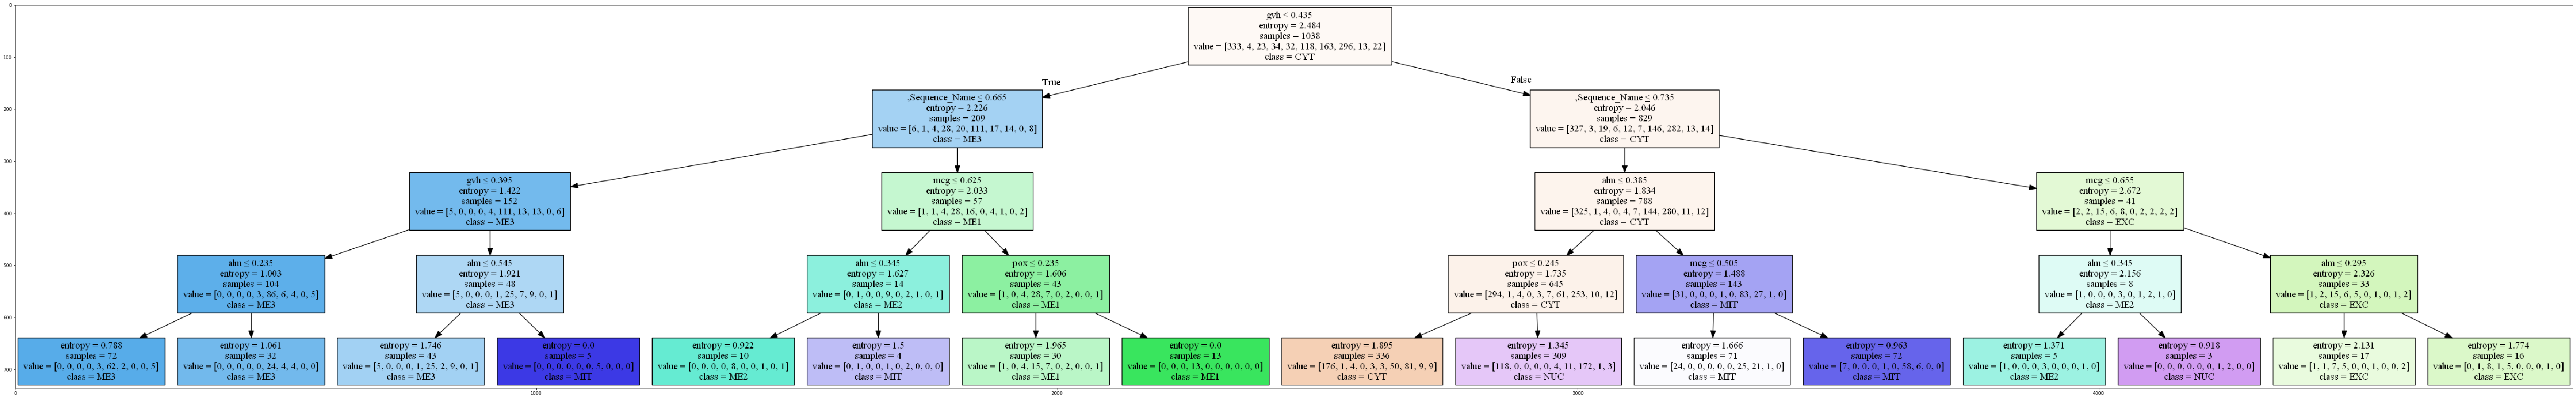

In [14]:
dot_data = StringIO()
filename = "proteintree.png"
featureNames = my_data.columns[0:7]
targetNames = my_data["Class_Distribution"].unique().tolist()
out=tree.export_graphviz(proteinTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')